In [11]:
import GPy
from GPy.inference.optimization import Optimizer
%matplotlib inline

In [12]:
import climin

In Paramz/GPy we can implement an own optimizer in a really simple way. We need to supply GPy with an implementation of the Optimizer class.
The Optimizer has a name, which is the most important. 

It also provides an opt() method, which opitmizes the result given an optimization function and a starting point.

In [13]:
# Get the parameters for Rprop of climin:
climin.Rprop?

In [14]:
class RProp(Optimizer):
    # We want the optimizer to know some things in the Optimizer implementation:
    def __init__(self, step_shrink=0.5, step_grow=1.2, min_step=1e-06, max_step=1, changes_max=0.1, *args, **kwargs):
        super(RProp, self).__init__(*args, **kwargs)
        self.opt_name = 'RProp (climin)'
        self.step_shrink = step_shrink
        self.step_grow = step_grow
        self.min_step = min_step
        self.max_step = max_step
        self.changes_max = changes_max
        
    def opt(self, x_init, f_fp=None, f=None, fp=None):
        # We only need the gradient of the 
        assert not fp is None

        # Do the optimization, giving previously stored parameters
        opt = climin.rprop.Rprop(x_init, fp, 
                                 step_shrink=self.step_shrink, step_grow=self.step_grow, 
                                 min_step=self.min_step, max_step=self.max_step, 
                                 changes_max=self.changes_max)

        # Get the optimized state and transform it into Paramz readable format by setting
        # values on this object:
        # Important ones are x_opt and status:
        for info in opt:
            if info['n_iter']>=self.max_iters:
                self.x_opt =  opt.wrt
                self.status = 'maximum number of function evaluations exceeded'
                break

This is all we need, GPy/Paramz will handle the rest for you : )

In [15]:
m = GPy.examples.regression.toy_rbf_1d_50(optimize=False, plot=False)

This is the model plot before optimization:

In [16]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


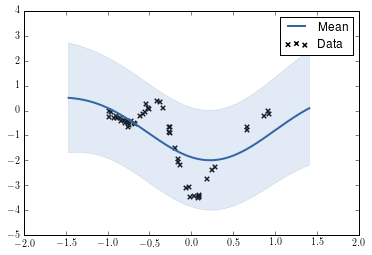

In [17]:
m.plot()

In [18]:
m.optimize(RProp(), messages=1)

And then the optimized state after running RProp:

In [19]:
m

GP_regression.,value,constraints,priors
rbf.variance,2.09912029816,+ve,
rbf.lengthscale,0.275423851372,+ve,
Gaussian_noise.variance,0.0106782996505,+ve,


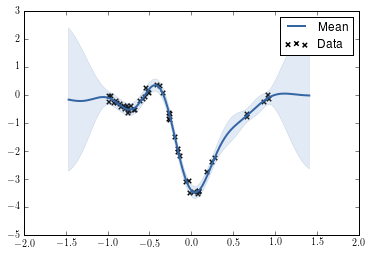

In [20]:
m.plot()